<a href="https://colab.research.google.com/github/MaboKarl/CCMLRL_EXERCISES_COM231ML/blob/main/Copy_of_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [13]:
df = pd.read_excel("data.xlsx")

Display the summary of all the features of the dataset using `.info()`

In [14]:
df.head()

,Name,Post/Share Frequently,Active,Replies to comments/messages,# friends/followers,Personality
0,Liao,0,1,1,424,1
1,Orro,0,1,1,500,1
2,Ruiz,0,1,1,275,1
3,Antonio,0,0,0,21,0
4,Genesis,1,1,0,912,1


Display the total number of samples from each label using `.value_counts()`

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Name                          99 non-null     object
 1   Post/Share Frequently         99 non-null     int64 
 2   Active                        99 non-null     int64 
 3   Replies to comments/messages  99 non-null     int64 
 4   # friends/followers           99 non-null     int64 
 5   Personality                   99 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

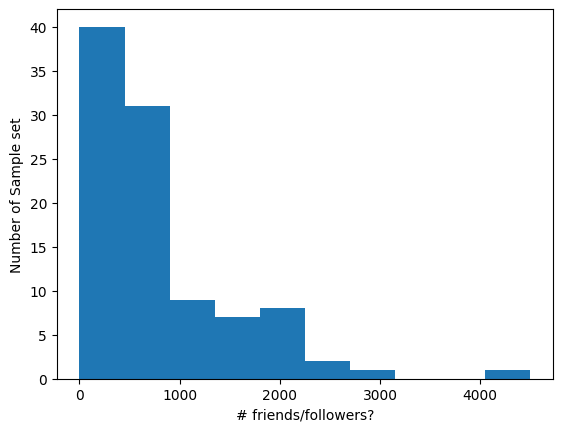

In [17]:
plt.hist(df["# friends/followers"])
plt.xlabel("# friends/followers?")
plt.ylabel("Number of Sample set")
plt.show()

Remove the name column using `drop()` method

In [18]:
df = df.drop(columns=['Name'])

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [19]:
X = df.drop(columns=['Personality']).values
X

array([[   0,    1,    1,  424],
       [   0,    1,    1,  500],
       [   0,    1,    1,  275],
       [   0,    0,    0,   21],
       [   1,    1,    0,  912],
       [   1,    1,    1,  855],
       [   1,    1,    1, 1100],
       [   1,    1,    1, 1800],
       [   0,    1,    1,  591],
       [   0,    1,    1,  634],
       [   1,    1,    1, 4500],
       [   1,    1,    1, 2100],
       [   0,    1,    0,  600],
       [   0,    1,    1,  828],
       [   0,    0,    0,  822],
       [   0,    0,    0,  412],
       [   0,    1,    1,  645],
       [   0,    1,    1, 1400],
       [   1,    1,    1, 1414],
       [   1,    1,    1,  235],
       [   0,    1,    0,  202],
       [   0,    0,    1,  626],
       [   0,    1,    1, 1800],
       [   1,    1,    1,  549],
       [   1,    1,    1, 1500],
       [   1,    1,    1, 1100],
       [   0,    0,    0,  156],
       [   0,    1,    1,  478],
       [   0,    1,    0, 1200],
       [   1,    1,    1,    1],
       [  

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [20]:
y = df["Personality"].values
y

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1])

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(81, 4)
(81,)
(18, 4)
(18,)


Display the dimensions of each variables using `.shape()`

In [22]:
df.shape

(99, 5)

## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [23]:
knn = KNeighborsClassifier(n_neighbors=7)

Train the model using the `.fit()`

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Test the model using the `.predict()`

In [25]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

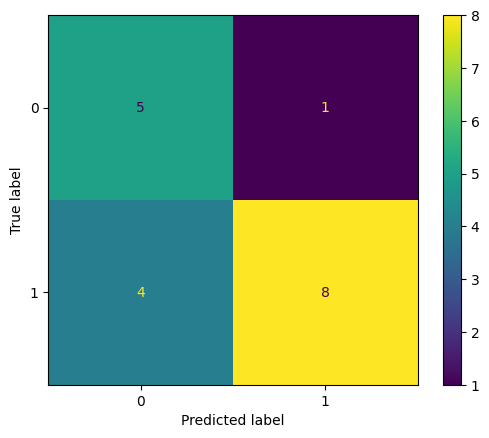

In [26]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [27]:
metrics.accuracy_score(y_test, y_pred)

0.7222222222222222

Display the precision

In [28]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.83333333 0.66666667]


Display the recall

In [29]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [0.55555556 0.88888889]


Display the f1-score

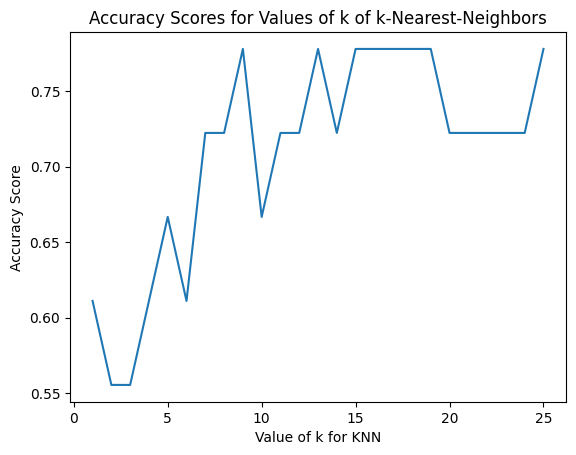

In [30]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [31]:
knn.predict([[1, 1, 300, 0]])

array([0])